# Regression Model Validation - Lab

## Introduction

In this lab, you'll be able to validate your Boston Housing data model using train-test split.


## Objectives

You will be able to:

- Compare training and testing errors to determine if model is over or underfitting


## Let's use our Boston Housing Data again!

This time, let's only include the variables that were previously selected using recursive feature elimination. We included the code to preprocess below.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_boston

boston = load_boston()

boston_features = pd.DataFrame(boston.data, columns = boston.feature_names)
b = boston_features['B']
logdis = np.log(boston_features['DIS'])
loglstat = np.log(boston_features['LSTAT'])

# Min-Max scaling
boston_features['B'] = (b-min(b))/(max(b)-min(b))
boston_features['DIS'] = (logdis-min(logdis))/(max(logdis)-min(logdis))

# Standardization
boston_features['LSTAT'] = (loglstat-np.mean(loglstat))/np.sqrt(np.var(loglstat))

In [5]:
X = boston_features[['CHAS', 'RM', 'DIS', 'B', 'LSTAT']]
y = pd.DataFrame(boston.target, columns = ['target'])

In [7]:
X,y

(     CHAS     RM       DIS         B     LSTAT
 0     0.0  6.575  0.542096  1.000000 -1.275260
 1     0.0  6.421  0.623954  1.000000 -0.263711
 2     0.0  7.185  0.623954  0.989737 -1.627858
 3     0.0  6.998  0.707895  0.994276 -2.153192
 4     0.0  7.147  0.707895  1.000000 -1.162114
 ..    ...    ...       ...       ...       ...
 501   0.0  6.593  0.331081  0.987619 -0.169811
 502   0.0  6.120  0.297277  1.000000 -0.274682
 503   0.0  6.976  0.274575  1.000000 -1.067939
 504   0.0  6.794  0.315551  0.991301 -0.836660
 505   0.0  6.030  0.335545  1.000000 -0.510809
 
 [506 rows x 5 columns],      target
 0      24.0
 1      21.6
 2      34.7
 3      33.4
 4      36.2
 ..      ...
 501    22.4
 502    20.6
 503    23.9
 504    22.0
 505    11.9
 
 [506 rows x 1 columns])

### Perform a train-test split

In [21]:
# Split the data into training and test sets. Use the default split size
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=57)
X_train.shape,X_test.shape,y_train.shape,y_test.shape,(X_test.shape[0]/(X_test.shape[0]+X_train.shape[0]))

((404, 5), (102, 5), (404, 1), (102, 1), 0.2015810276679842)

### Apply your model to the train set

In [22]:
# Importing and initialize the linear regression model class


In [23]:
# Fit the model to train data
from sklearn.linear_model import LinearRegression  # linear regression 
linreg = LinearRegression()

model = linreg.fit(X_train,y_train)
print(model.coef_)
print(model.intercept_)


[[ 2.76598058  3.42495953 -6.5200886   4.1019562  -6.24174566]]
[-0.05792505]


In [24]:
linreg.fit(X_train,y_train)
print(linreg.coef_)
print(linreg.intercept_)

[[ 2.76598058  3.42495953 -6.5200886   4.1019562  -6.24174566]]
[-0.05792505]


### Calculate predictions on training and test sets

In [25]:
# Calculate predictions on training and test sets
y_hat_train = model.predict(X_train)
y_hat_test = model.predict(X_test)
y_hat_train.shape,y_hat_test.shape

((404, 1), (102, 1))

### Calculate training and test residuals

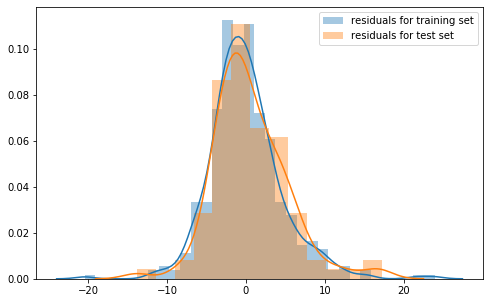

In [45]:
# Calculate residuals
res_train = y_train-y_hat_train
res_test = y_test-y_hat_test
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
sns.distplot(res_train,label= 'residuals for training set')
sns.distplot(res_test,label= 'residuals for test set')
plt.legend()
plt.show();

### Calculate the Mean Squared Error (MSE)

A good way to compare overall performance is to compare the mean squarred error for the predicted values on the training and test sets.

In [34]:
type(res_train),res_train.shape,len(res_train)


(pandas.core.frame.DataFrame, (404, 1), 404)

In [32]:
res_train,res_train**2

(        target
 82   -1.374066
 261  11.103004
 399  -5.697839
 55    3.824295
 319   1.299592
 ..         ...
 79   -1.746644
 406   2.176897
 5    -0.212622
 214  15.345627
 463  -4.037513
 
 [404 rows x 1 columns],          target
 82     1.888057
 261  123.276697
 399   32.465373
 55    14.625229
 319    1.688939
 ..          ...
 79     3.050766
 406    4.738881
 5      0.045208
 214  235.488259
 463   16.301515
 
 [404 rows x 1 columns])

In [38]:
# mean square errors
mse_train = (np.sum(res_train**2)) / (len(res_train))
mse_test = (np.sum(res_test**2)) / (len(res_test))
mse_train,mse_test

(target    21.577735
 dtype: float64, target    22.334711
 dtype: float64)

In [59]:
# Import mean_squared_error from sklearn.metrics
from sklearn.metrics import mean_squared_error
train_mse = mean_squared_error(y_train,y_hat_train)
test_mse = mean_squared_error(y_test,y_hat_test)
train_mse,test_mse

(21.57773528645344, 22.334710521145507)

In [ ]:
# Calculate training and test MSE


If your test error is substantially worse than the train error, this is a sign that the model doesn't generalize well to future cases.

One simple way to demonstrate overfitting and underfitting is to alter the size of our train-test split. By default, scikit-learn allocates 25% of the data to the test set and 75% to the training set. Fitting a model on only 10% of the data is apt to lead to underfitting, while training a model on 99% of the data is apt to lead to overfitting.

# Evaluate the effect of train-test split size

Iterate over a range of train-test split sizes from .5 to .95. For each of these, generate a new train/test split sample. Fit a model to the training sample and calculate both the training error and the test error (mse) for each of these splits. Plot these two curves (train error vs. training size and test error vs. training size) on a graph.

In [58]:
split_sizes=np.linspace(.5,.95,num =10)
split_sizes

array([0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])

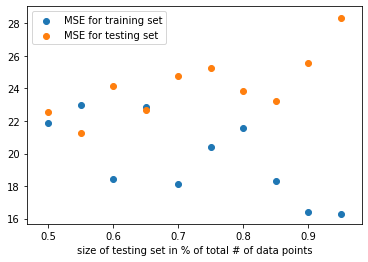

In [69]:
train_mse_list = []
test_mse_list = []
for size in split_sizes:
    # Split the data into training and test sets. 
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=size)
    # Fit the model to train data
    model = linreg.fit(X_train,y_train)
    # Calculate predictions on training and test sets
    y_hat_train = model.predict(X_train)
    y_hat_test = model.predict(X_test)
    # Calculate mean square errors
    train_mse = mean_squared_error(y_train,y_hat_train)
    test_mse = mean_squared_error(y_test,y_hat_test)    
    train_mse_list.append(train_mse) 
    test_mse_list.append(test_mse) 

plt.scatter(x=split_sizes,y=train_mse_list,label = 'MSE for training set')
plt.scatter(x=split_sizes,y=test_mse_list,label = 'MSE for testing set')
plt.xlabel('size of testing set in % of total # of data points')
plt.legend()
plt.show();

# Evaluate the effect of train-test split size: Extension

Repeat the previous example, but for each train-test split size, generate 100 iterations of models/errors and save the average train/test error. This will help account for any particularly good/bad models that might have resulted from poor/good splits in the data. 

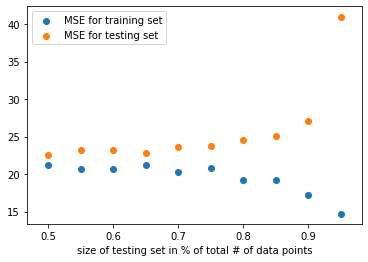

In [67]:
train_mse_avg_list = []
test_mse_avg_list = []
for size in split_sizes:
    # Split the data into training and test sets. 
    idx=1
    train_mse_list = []
    test_mse_list = []
    while idx < 101:
        X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=size)
        # Fit the model to train data
        model = linreg.fit(X_train,y_train)
        # Calculate predictions on training and test sets
        y_hat_train = model.predict(X_train)
        y_hat_test = model.predict(X_test)
        # Calculate mean square errors
        train_mse = mean_squared_error(y_train,y_hat_train)
        test_mse = mean_squared_error(y_test,y_hat_test)    
        train_mse_list.append(train_mse) 
        test_mse_list.append(test_mse)
        idx+=1
    train_mse_avg=np.sum(train_mse_list)/idx
    test_mse_avg=np.sum(test_mse_list)/idx
    train_mse_avg_list.append(train_mse_avg) 
    test_mse_avg_list.append(test_mse_avg)        

plt.scatter(x=split_sizes,y=train_mse_avg_list,label = 'MSE for training set')
plt.scatter(x=split_sizes,y=test_mse_avg_list,label = 'MSE for testing set')
plt.xlabel('size of testing set in % of total # of data points')
plt.legend()
plt.show();

What's happening here? Evaluate your result!

In [ ]:
# As the size of the the testing set incresases and becomes larger than 80% of all datapoints, 
# the size of the training set becomes critically small.
# This enables to get artificiallay lower error on the fitting of the model for the training set.
# But, at the same time, the model generalization to the test model gets worse 
# and the errors level of the model's prediction for the test set get much higher. 

##  Summary 

Congratulations! You now practiced your knowledge of MSE and used your train-test split skills to validate your model.